**Part 1**

**Student Name:** **Katusabe Victoria**

In [7]:
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 30.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pandas as pd
import joblib

# Load the data from the joblib file
data = joblib.load('/content/drive/MyDrive/Colab data uploads/Data Viz Belt Exam - OptionB/saved_model.joblib')

# Convert the loaded data into a Pandas DataFrame
df = pd.DataFrame(data)

# Now you can work with your DataFrame 'df'


In [1]:
# Import necessary libraries
import joblib

# Load the saved_model.joblib file from Google Drive
file_path = '/content/drive/MyDrive/Colab data uploads/Data Viz Belt Exam - OptionB/saved_model.joblib'
model = joblib.load(file_path)

# Now 'model' contains the loaded object, which could be a machine learning model or any other Python object
# You can use this object for further processing

**Part 2**

Load the provided csv, located in the zip file you downloaded in Part 1.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [94]:
import pandas as pd
# Load the saved_model.joblib file from Google Drive
file_path = '/content/drive/MyDrive/Colab data uploads/Data Viz Belt Exam - OptionB/zillow_home_values-zipcode.csv'
df = pd.read_csv(file_path)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,...,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107261.0,...,261945.0,267644.0,273946.0,280066.0,285121.0,288532.0,290458.0,291103.0,292081.0,292948.0
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,222569.0,...,453150.0,464727.0,478369.0,489712.0,497173.0,499429.0,497572.0,498113.0,500187.0,503109.0
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,90009.0,...,177319.0,179463.0,182812.0,186403.0,189836.0,192064.0,193760.0,195140.0,196787.0,198137.0
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,188096.0,...,570211.0,572145.0,573662.0,576469.0,578706.0,580834.0,581779.0,584566.0,588188.0,590722.0
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,275983.0,...,752025.0,757734.0,760336.0,766163.0,771443.0,776607.0,779281.0,782367.0,788211.0,793924.0


In [60]:
df.dtypes

RegionID        int64
SizeRank        int64
RegionName      int64
RegionType     object
StateName      object
               ...   
31072022      float64
31082022      float64
30092022      float64
31102022      float64
30112022      float64
Length: 284, dtype: object

In [4]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '31012000',
       ...
       '28022022', '31032022', '30042022', '31052022', '30062022', '31072022',
       '31082022', '30092022', '31102022', '30112022'],
      dtype='object', length=284)

In [95]:
# Melt columns containing '20' in their names
melted_df = pd.melt(df, id_vars=['RegionID','SizeRank','RegionName','StateName'],
                    value_vars=[col for col in df.columns if '20' in col],
                    var_name='Date', value_name='Value')

# Display the melted DataFrame
print(melted_df)

         RegionID  SizeRank  RegionName StateName      Date     Value
0           91940         0       77449        TX  31012000  107261.0
1           91982         1       77494        TX  31012000  222569.0
2           93144         2       79936        TX  31012000   90009.0
3           62080         3       11368        NY  31012000  188096.0
4           62093         4       11385        NY  31012000  275983.0
...           ...       ...         ...       ...       ...       ...
7546545     80190     30657       50160        IA  30112022  193591.0
7546546     65355     30657       18081        PA  30112022  376523.0
7546547     82217     30657       55366        MN  30112022  110082.0
7546548     80581     30657       51009        IA  30112022   75810.0
7546549     65963     30657       19490        PA  30112022  623590.0

[7546550 rows x 6 columns]


In [74]:
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Date,Value
0,91940,0,77449,TX,31012000,107261.0
1,91982,1,77494,TX,31012000,222569.0
2,93144,2,79936,TX,31012000,90009.0
3,62080,3,11368,NY,31012000,188096.0
4,62093,4,11385,NY,31012000,275983.0


In [75]:
melted_df.dtypes

RegionID        int64
SizeRank        int64
RegionName      int64
StateName      object
Date           object
Value         float64
dtype: object

In [96]:
# Convert the strings to datetime objects
melted_df['Date'] = pd.to_datetime(melted_df['Date'], format='%d%m%Y')
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Date,Value
0,91940,0,77449,TX,2000-01-31,107261.0
1,91982,1,77494,TX,2000-01-31,222569.0
2,93144,2,79936,TX,2000-01-31,90009.0
3,62080,3,11368,NY,2000-01-31,188096.0
4,62093,4,11385,NY,2000-01-31,275983.0


In [65]:
melted_df.dtypes

RegionID               int64
SizeRank               int64
RegionName             int64
StateName             object
State                 object
City                  object
Metro                 object
CountyName            object
Date          datetime64[ns]
Value                float64
dtype: object

In [97]:
melted_df = melted_df.set_index('Date')
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Value
Date,,,,,
2000-01-31,91940,0,77449,TX,107261.0
2000-01-31,91982,1,77494,TX,222569.0
2000-01-31,93144,2,79936,TX,90009.0
2000-01-31,62080,3,11368,NY,188096.0
2000-01-31,62093,4,11385,NY,275983.0


In [98]:
#filter specific states from the statename
melted_df = melted_df[melted_df['StateName'].isin(['MA', 'PA', 'NY', 'NJ', 'MD'])]
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Value
Date,,,,,
2000-01-31,62080,3,11368,NY,188096.0
2000-01-31,62093,4,11385,NY,275983.0
2000-01-31,61148,10,8701,NJ,164311.0
2000-01-31,62046,11,11236,NY,211331.0
2000-01-31,62019,14,11208,NY,204616.0


In [99]:
# Filter the DataFrame to keep only rows between 2008 and 2018 inclusive
melted_df = melted_df["2008":"2018"]

# Print the filtered DataFrame
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Value
Date,,,,,
2008-01-31,62080,3,11368,NY,447718.0
2008-01-31,62093,4,11385,NY,538860.0
2008-01-31,61148,10,8701,NJ,358246.0
2008-01-31,62046,11,11236,NY,468185.0
2008-01-31,62019,14,11208,NY,486673.0


In [100]:
melted_df.tail()

,RegionID,SizeRank,RegionName,StateName,Value
Date,,,,,
2018-12-31,62607,30657,12489,NY,141646.0
2018-12-31,64515,30657,16245,PA,55216.0
2018-12-31,65172,30657,17762,PA,NaN
2018-12-31,65355,30657,18081,PA,NaN
2018-12-31,65963,30657,19490,PA,NaN


In [101]:
# Resample to yearly frequency using mean as the aggregation function
yearly_mean_home_values = melted_df.groupby('StateName').resample('Y').mean()

yearly_mean_home_values

RegionID      SizeRank    RegionName          Value
StateName Date                                                               
MA        2008-12-31  58542.194779  11144.977912   1874.825301  370276.125465
          2009-12-31  58542.194779  11144.977912   1874.825301  353451.300158
          2010-12-31  58542.194779  11144.977912   1874.825301  354704.040966
          2011-12-31  58542.194779  11144.977912   1874.825301  344022.053294
          2012-12-31  58542.194779  11144.977912   1874.825301  337760.405269
          2013-12-31  58542.194779  11144.977912   1874.825301  358073.753575
          2014-12-31  58542.194779  11144.977912   1874.825301  378459.686192
          2015-12-31  58542.194779  11144.977912   1874.825301  393671.946304
          2016-12-31  58542.194779  11144.977912   1874.825301  407772.944176
          2017-12-31  58542.194779  11144.977912   1874.825301  427188.845417
          2018-12-31  58542.194779  11144.977912   1874.825301  450979.536672
MD        2008-12-31  66810.870070  13259.262181  21245.916473  359630.331758
          2009-12-31  66810.870070  13259.262181  21245.916473  319528.862421
          2010-12-31  66810.870070  13259.262181  21245.916473  305117.949273
          2011-12-31  66810.870070  13259.262181  21245.916473  291514.457996
          2012-12-31  66810.870070  13259.262181  21245.916473  284355.912915
          2013-12-31  66810.870070  13259.262181  21245.916473  296858.035497
          2014-12-31  66810.870070  13259.262181  21245.916473  306695.239216
          2015-12-31  66810.870070  13259.262181  21245.916473  306827.054118
          2016-12-31  66810.870070  13259.262181  21245.916473  308879.072563
          2017-12-31  66810.870070  13259.262181  21245.916473  317503.221570
          2018-12-31  66810.870070  13259.262181  21245.916473  327619.580519
NJ        2008-12-31  60875.608541  10151.581851   7925.832740  419298.048266
          2009-12-31  60875.608541  10151.581851   7925.832740  392674.667139
          2010-12-31  60875.608541  10151.581851   7925.832740  379620.174213
          2011-12-31  60875.608541  10151.581851   7925.832740  358189.407044
          2012-12-31  60875.608541  10151.581851   7925.832740  341947.976072
          2013-12-31  60875.608541  10151.581851   7925.832740  346531.070059
          2014-12-31  60875.608541  10151.581851   7925.832740  361237.879563
          2015-12-31  60875.608541  10151.581851   7925.832740  362191.101417
          2016-12-31  60875.608541  10151.581851   7925.832740  364417.332934
          2017-12-31  60875.608541  10151.581851   7925.832740  373991.762993
          2018-12-31  60875.608541  10151.581851   7925.832740  388572.464099
NY        2008-12-31  63176.337072  14641.254206  12724.879128  295154.775963
          2009-12-31  63176.337072  14641.254206  12724.879128  278740.456293
          2010-12-31  63176.337072  14641.254206  12724.879128  271226.922109
          2011-12-31  63176.337072  14641.254206  12724.879128  267413.730681
          2012-12-31  63176.337072  14641.254206  12724.879128  263891.637005
          2013-12-31  63176.337072  14641.254206  12724.879128  270369.310839
          2014-12-31  63176.337072  14641.254206  12724.879128  284347.549166
          2015-12-31  63176.337072  14641.254206  12724.879128  296118.281517
          2016-12-31  63176.337072  14641.254206  12724.879128  303402.832309
          2017-12-31  63176.337072  14641.254206  12724.879128  313697.017925
          2018-12-31  63176.337072  14641.254206  12724.879128  327252.606965
PA        2008-12-31  66345.552482  15209.643972  17182.524823  196780.894388
          2009-12-31  66345.552482  15209.643972  17182.524823  175373.028592
          2010-12-31  66345.552482  15209.643972  17182.524823  170814.761501
          2011-12-31  66345.552482  15209.643972  17182.524823  162272.051026
          2012-12-31  66345.552482  15209.643972  17182.524823  157486.611419
          2013-12-31  66345.552482  15209.643972

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

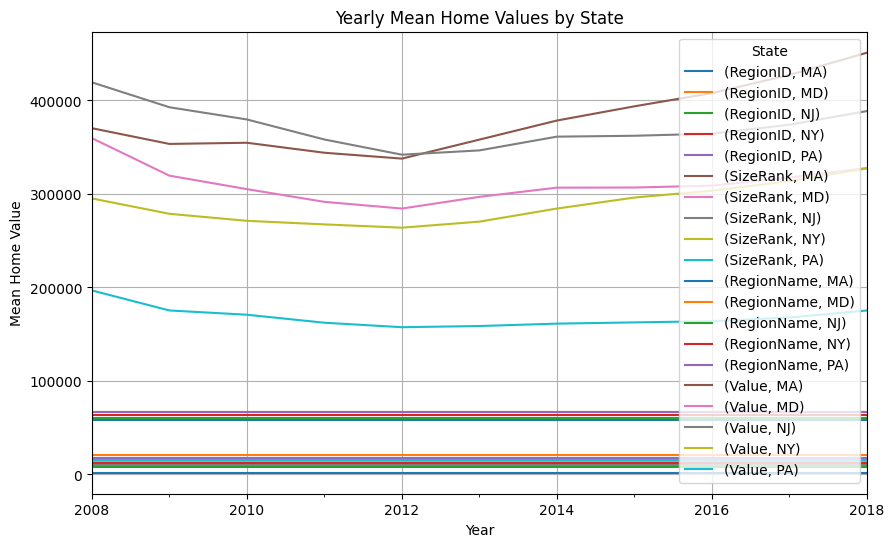

In [103]:
# Resample to yearly frequency using mean as the aggregation function
yearly_mean_home_values = melted_df.groupby(['StateName', pd.Grouper(freq='Y')]).mean().unstack(level=0)

# Plotting
yearly_mean_home_values.plot(kind='line', figsize=(10, 6))

plt.title('Yearly Mean Home Values by State')
plt.xlabel('Year')
plt.ylabel('Mean Home Value')
plt.grid(True)
plt.legend(title='State')
plt.show()

In [104]:
# Melt columns containing '20' in their names
melted_df2 = pd.melt(df, id_vars=['RegionID','SizeRank','RegionName','StateName','State','City','Metro','CountyName'],
                    value_vars=[col for col in df.columns if '20' in col],
                    var_name='Date', value_name='Value')

# Display the melted DataFrame
print(melted_df2)

         RegionID  SizeRank  RegionName StateName State          City  \
0           91940         0       77449        TX    TX           NaN   
1           91982         1       77494        TX    TX           NaN   
2           93144         2       79936        TX    TX       El Paso   
3           62080         3       11368        NY    NY      New York   
4           62093         4       11385        NY    NY      New York   
...           ...       ...         ...       ...   ...           ...   
7546545     80190     30657       50160        IA    IA   Martensdale   
7546546     65355     30657       18081        PA    PA    Hellertown   
7546547     82217     30657       55366        MN    MN           NaN   
7546548     80581     30657       51009        IA    IA       Calumet   
7546549     65963     30657       19490        PA    PA  Collegeville   

                                               Metro         CountyName  \
0               Houston-The Woodlands-Sugar Land

In [106]:
# Convert the strings to datetime objects
melted_df2['Date'] = pd.to_datetime(melted_df2['Date'], format='%d%m%Y')
melted_df2.head()

,RegionID,SizeRank,RegionName,StateName,State,City,Metro,CountyName,Date,Value
0,91940,0,77449,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,107261.0
1,91982,1,77494,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2000-01-31,222569.0
2,93144,2,79936,TX,TX,El Paso,"El Paso, TX",El Paso County,2000-01-31,90009.0
3,62080,3,11368,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,188096.0
4,62093,4,11385,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,275983.0


In [107]:
melted_df2.head()

,RegionID,SizeRank,RegionName,StateName,State,City,Metro,CountyName,Date,Value
0,91940,0,77449,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,107261.0
1,91982,1,77494,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2000-01-31,222569.0
2,93144,2,79936,TX,TX,El Paso,"El Paso, TX",El Paso County,2000-01-31,90009.0
3,62080,3,11368,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,188096.0
4,62093,4,11385,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,275983.0


In [108]:
# Define the file path
file_path = "/content/drive/MyDrive/Colab data uploads/Data Viz Belt Exam - OptionB/Data/data-for-tableau.csv"
#/content/drive/MyDrive/Colab data uploads/Data Viz Belt Exam - OptionB
# Save the DataFrame as a CSV file
melted_df2.to_csv(file_path, index=False)

print("DataFrame saved as CSV file:", file_path)

DataFrame saved as CSV file: /content/drive/MyDrive/Colab data uploads/Data Viz Belt Exam - OptionB/Data/data-for-tableau.csv


**Part 3**

https://public.tableau.com/app/profile/victoria.katusabe/viz/BeltExamPart3KatusabeVictoria/Createachoroplethmapofthemedianhomevaluebyzipcode?publish=yes